In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aryashah2k/credit-card-customer-data

  0% 0.00/6.28k [00:00<?, ?B/s]
100% 6.28k/6.28k [00:00<00:00, 11.3MB/s]


In [ ]:
!unzip credit-card-customer-data.zip -d /content/dataset

Archive:  credit-card-customer-data.zip
  inflating: /content/dataset/Credit Card Customer Data.csv  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/dataset/Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
X = data.iloc[:, 2:]
X.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
X.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<Axes: >

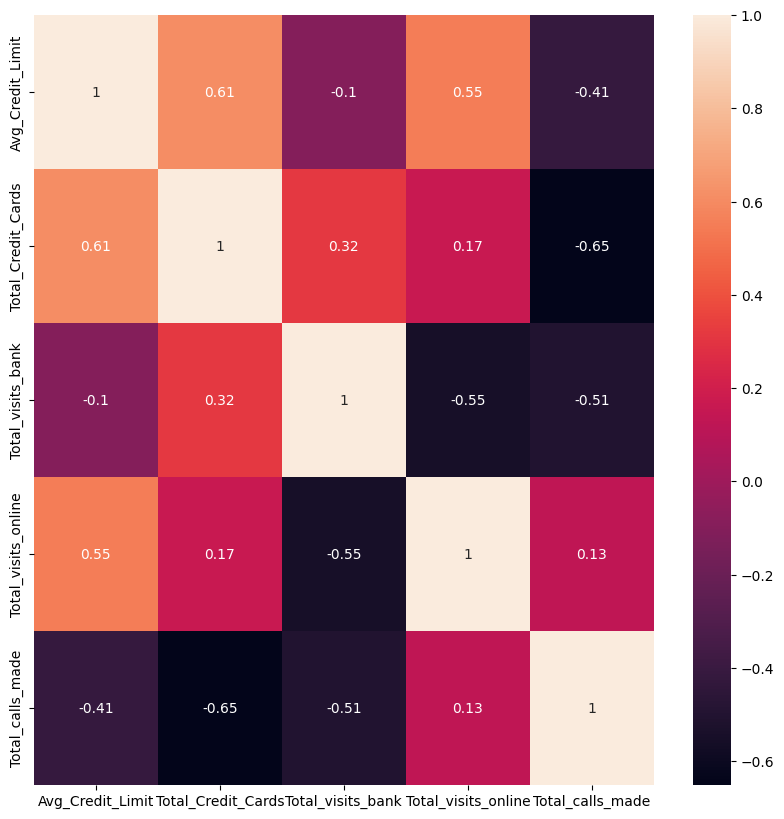

In [ ]:
corr_mat= X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)

In [ ]:
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(X)
X[0:5]

array([[0.49238579, 0.11111111, 0.2       , 0.06666667, 0.        ],
       [0.23857868, 0.22222222, 0.        , 0.66666667, 0.9       ],
       [0.23857868, 0.66666667, 0.2       , 0.2       , 0.4       ],
       [0.13705584, 0.44444444, 0.2       , 0.06666667, 0.4       ],
       [0.49238579, 0.55555556, 0.        , 0.8       , 0.3       ]])

#K-Means clustering

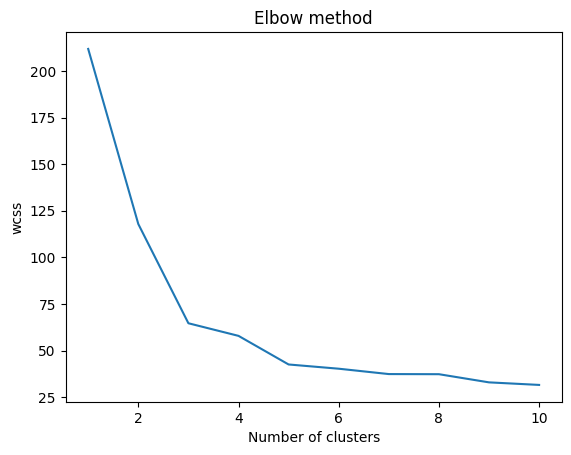

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 41, n_init = 'auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 41, n_init = 'auto')
ykmeans = kmeans.fit_predict(X)

In [ ]:
print(ykmeans)

[1 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
data = data.values

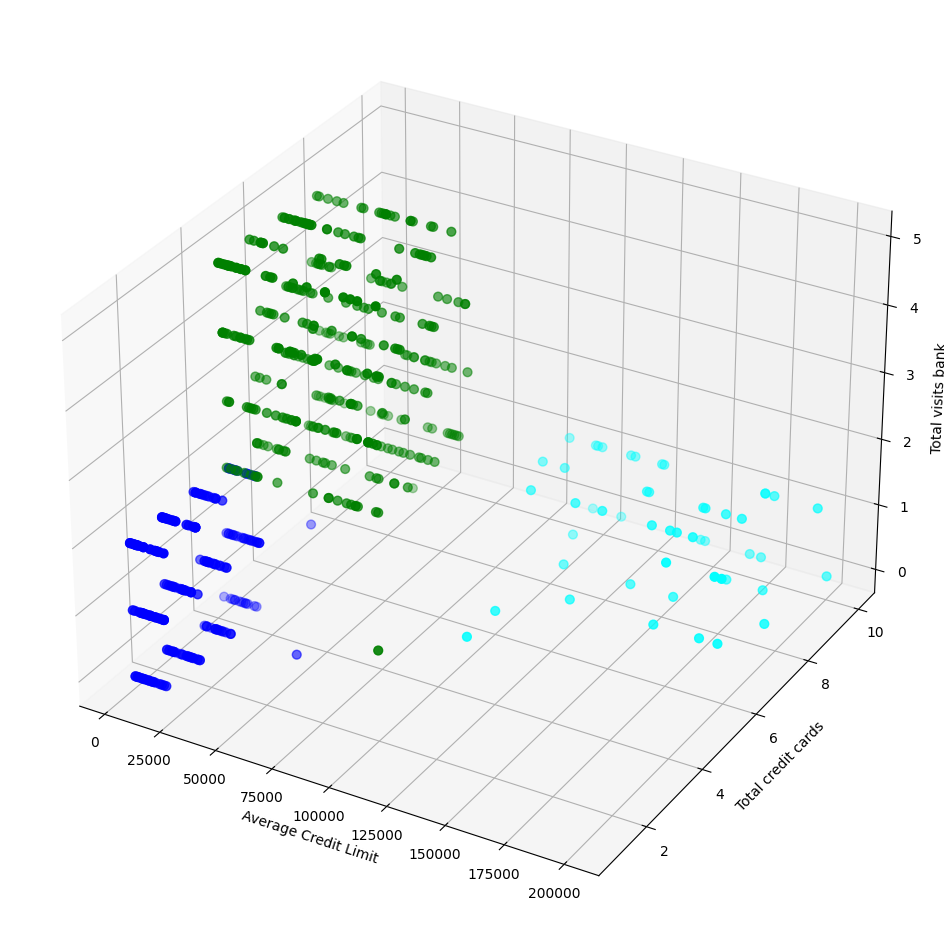

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[ykmeans == 0, 2], data[ykmeans == 0, 3], data[ykmeans == 0, 4], s = 40, color = 'blue')
ax.scatter(data[ykmeans == 1, 2], data[ykmeans == 1, 3], data[ykmeans == 1, 4], s = 40, color = 'green')
ax.scatter(data[ykmeans == 2, 2], data[ykmeans == 2, 3], data[ykmeans == 2, 4], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total visits bank')
plt.show()

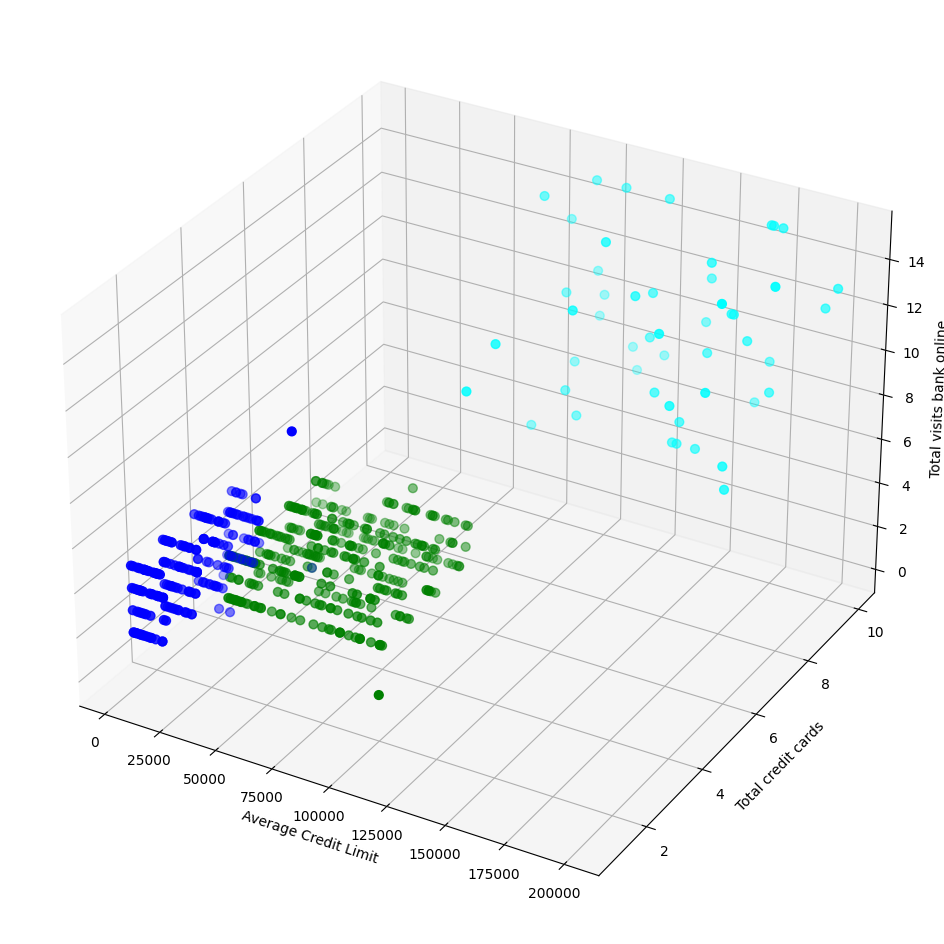

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[ykmeans == 0, 2], data[ykmeans == 0, 3], data[ykmeans == 0, 5], s = 40, color = 'blue')
ax.scatter(data[ykmeans == 1, 2], data[ykmeans == 1, 3], data[ykmeans == 1, 5], s = 40, color = 'green')
ax.scatter(data[ykmeans == 2, 2], data[ykmeans == 2, 3], data[ykmeans == 2, 5], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total visits bank online')
plt.show()

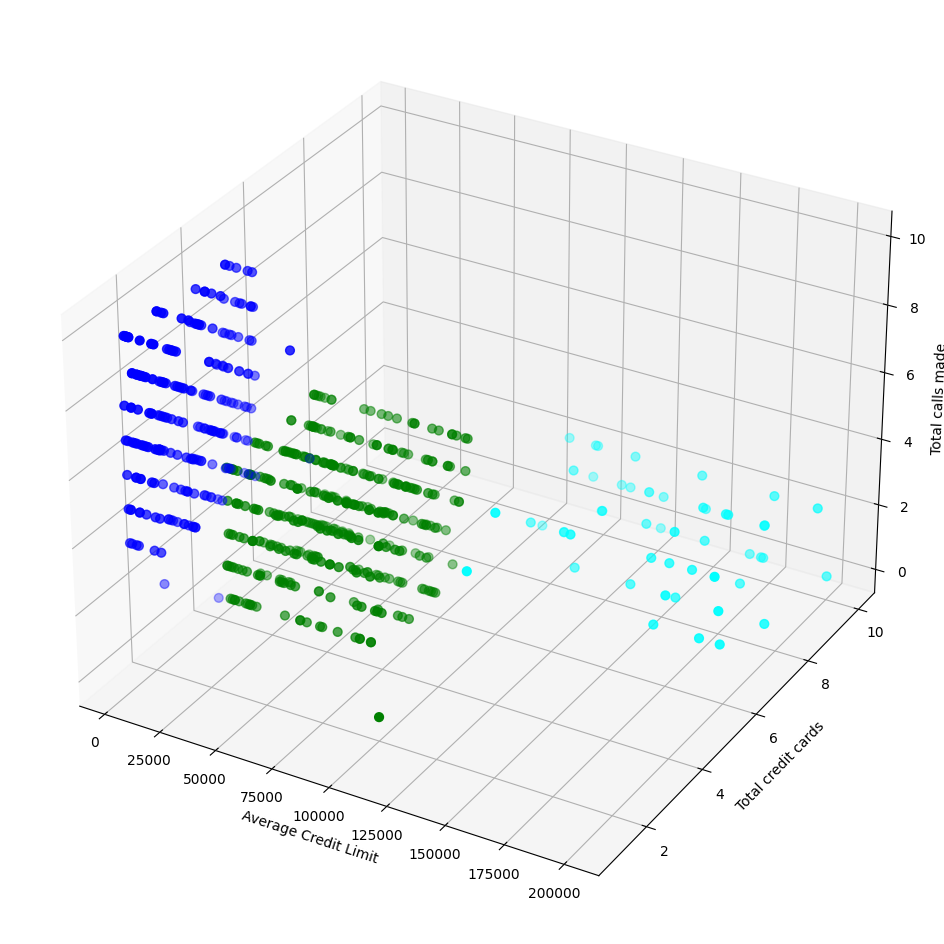

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[ykmeans == 0, 2], data[ykmeans == 0, 3], data[ykmeans == 0, 6], s = 40, color = 'blue')
ax.scatter(data[ykmeans == 1, 2], data[ykmeans == 1, 3], data[ykmeans == 1, 6], s = 40, color = 'green')
ax.scatter(data[ykmeans == 2, 2], data[ykmeans == 2, 3], data[ykmeans == 2, 6], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total calls made')
plt.show()

#Hierarchical Clustering

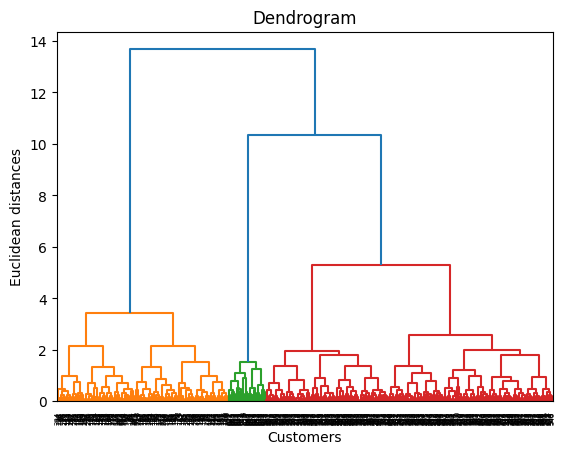

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

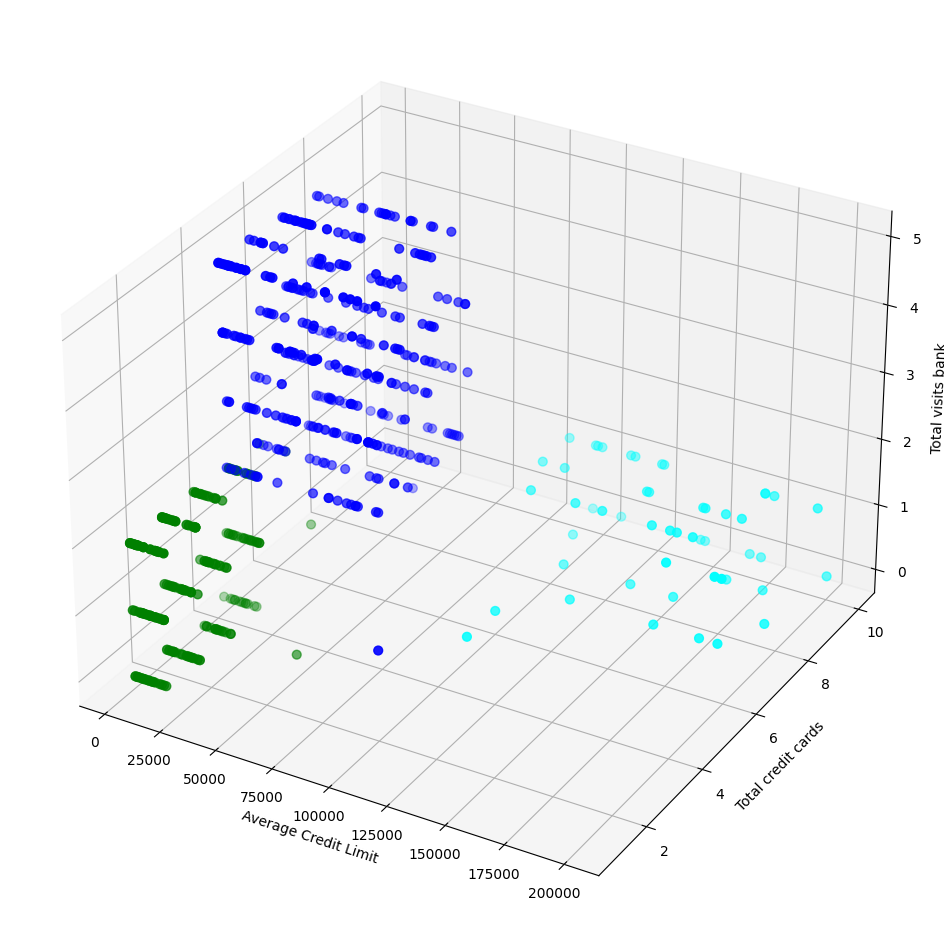

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[y_hc == 0, 2], data[y_hc == 0, 3], data[y_hc == 0, 4], s = 40, color = 'blue')
ax.scatter(data[y_hc == 1, 2], data[y_hc == 1, 3], data[y_hc == 1, 4], s = 40, color = 'green')
ax.scatter(data[y_hc == 2, 2], data[y_hc == 2, 3], data[y_hc == 2, 4], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total visits bank')
plt.show()

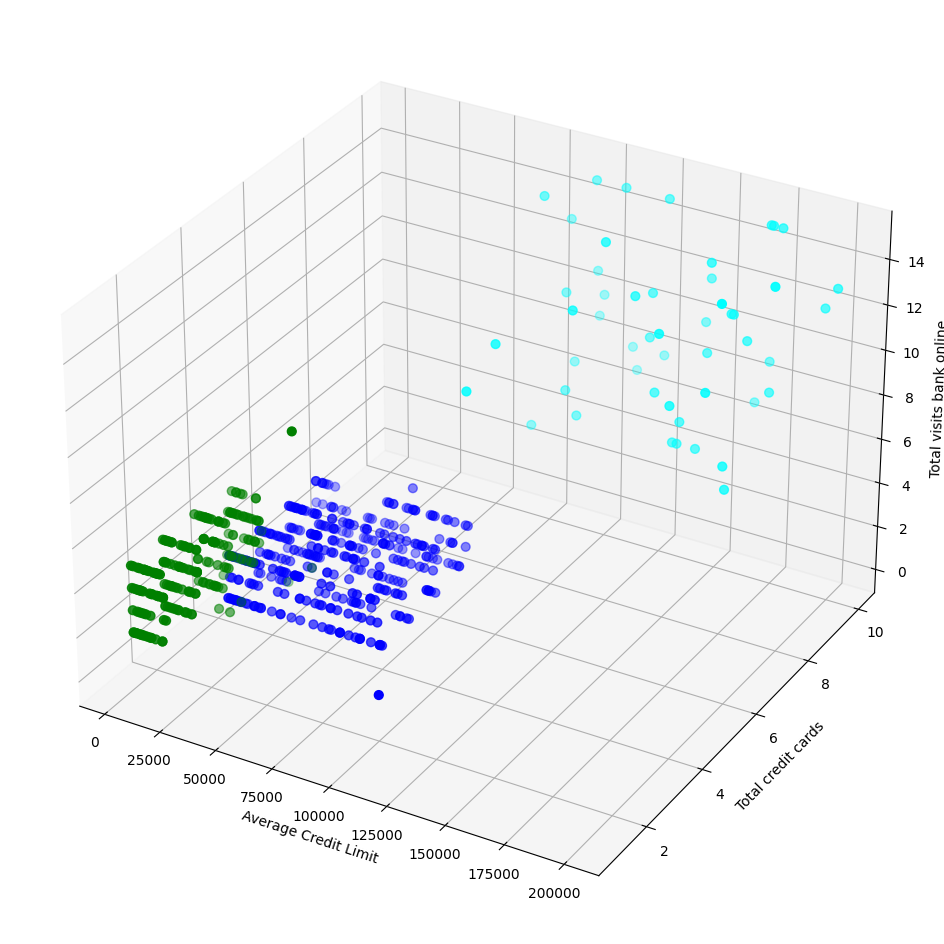

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[y_hc == 0, 2], data[y_hc == 0, 3], data[y_hc == 0, 5], s = 40, color = 'blue')
ax.scatter(data[y_hc == 1, 2], data[y_hc == 1, 3], data[y_hc == 1, 5], s = 40, color = 'green')
ax.scatter(data[y_hc == 2, 2], data[y_hc == 2, 3], data[y_hc == 2, 5], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total visits bank online')
plt.show()

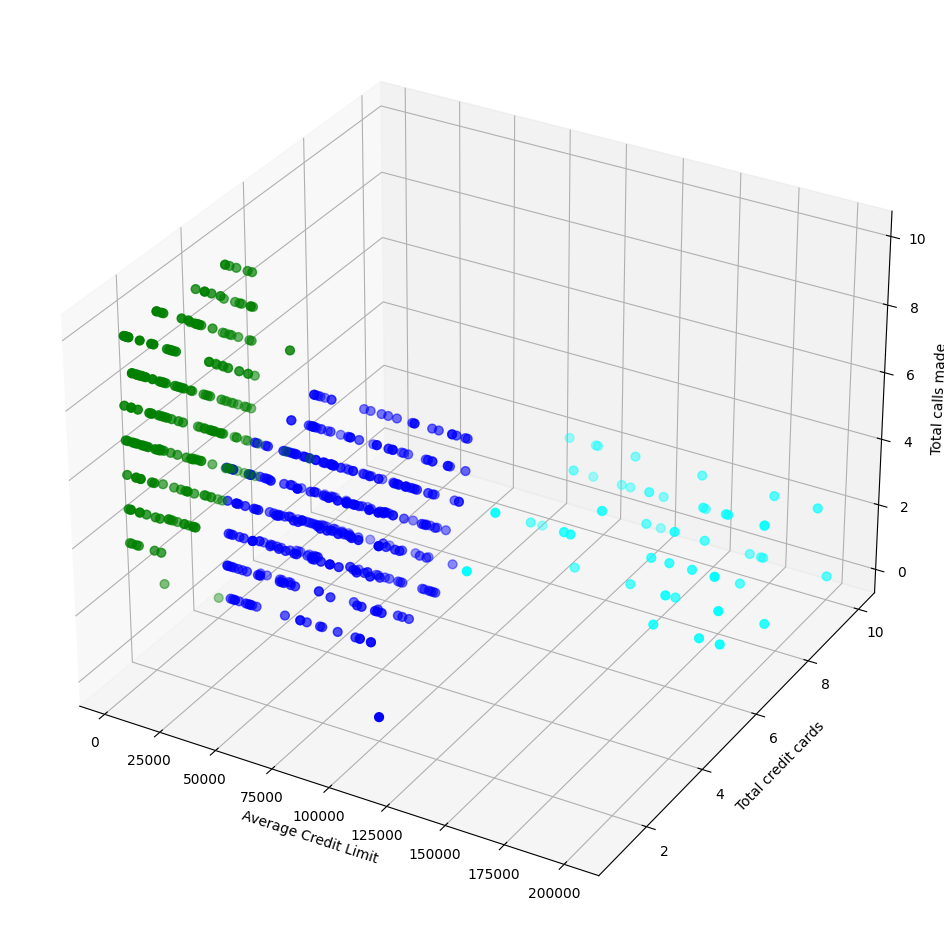

In [ ]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[y_hc == 0, 2], data[y_hc == 0, 3], data[y_hc == 0, 6], s = 40, color = 'blue')
ax.scatter(data[y_hc == 1, 2], data[y_hc == 1, 3], data[y_hc == 1, 6], s = 40, color = 'green')
ax.scatter(data[y_hc == 2, 2], data[y_hc == 2, 3], data[y_hc == 2, 6], s = 40, color = 'cyan')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total credit cards')
ax.set_zlabel('Total calls made')
plt.show()